## ASSIGNMENT 3 DICOM

#### JEMA SHARIN PANKIRAJ


##### 1. Snapshot of the Jupyter notebook

larger image


[0, 511, 0, 511]

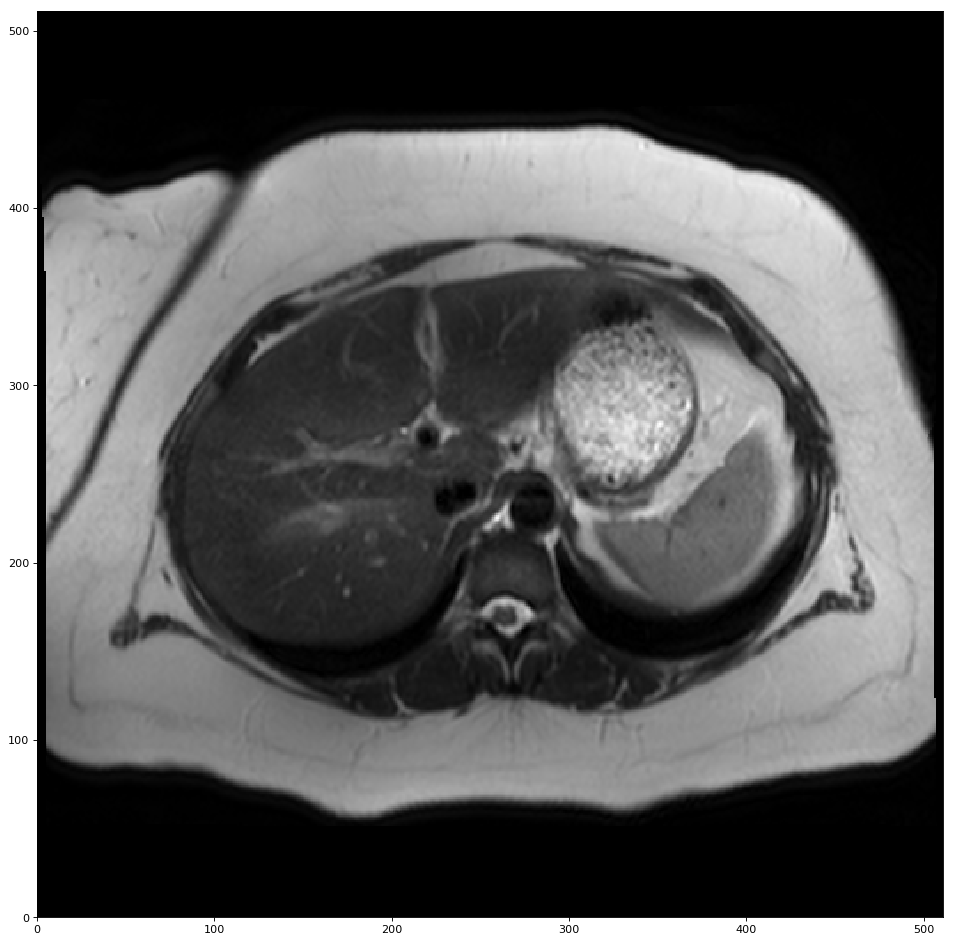

In [1]:
# changing the size of the image
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dicom
# Get file
RefDs = dicom.read_file('IM_0028.dcm')


ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns))
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
ds = dicom.read_file('IM_0028.dcm')
ArrayDicom[:,:]=ds.pixel_array

#plt.figure()
print("larger image")
fig=plt.figure(figsize=(15, 15), dpi= 80, facecolor='w', edgecolor='k')
plt.axes().set_aspect('equal') #this makes the image square
plt.set_cmap(plt.gray()) #grayscale
x=np.arange(RefDs.Rows)
y=np.arange(RefDs.Columns)

plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :]))
plt.axis([x.min(),x.max(),y.min(),y.max()])

##### 2 DICOM reading

##### 2.1 Download DICOM Viewer

RadiAnt DICOM Viewer 4.1.6 (64-bit)

##### 2.2 opening files in DICOM Viewer

Snap shot of the image IM_0028 opened in RadiAnt DICOM Viewer

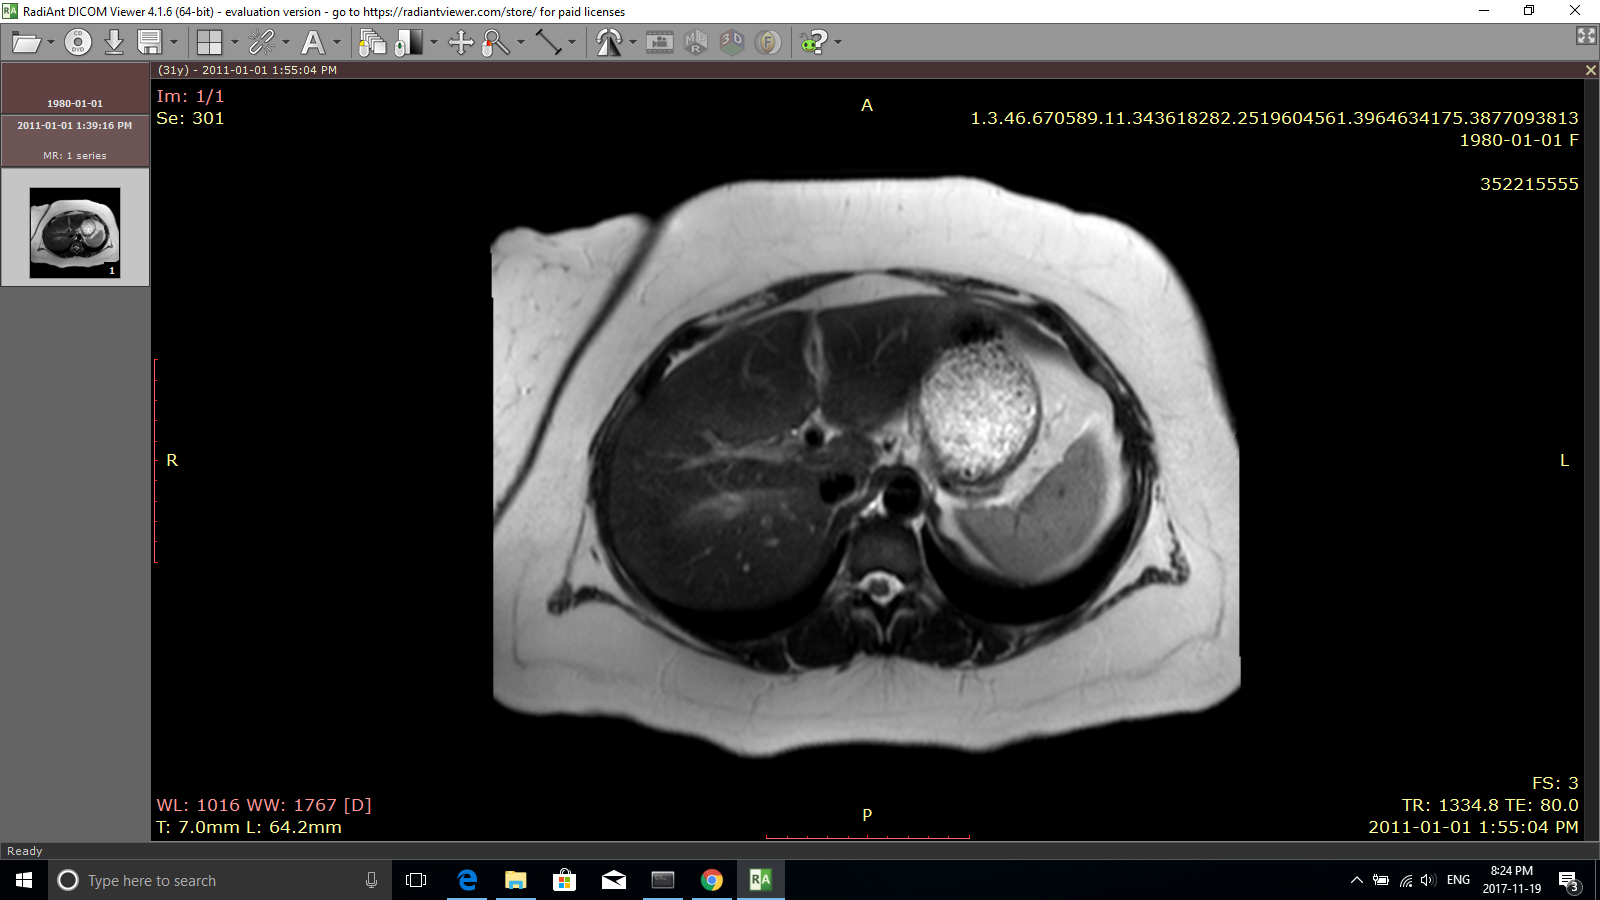

Snap shot of the image im140 opened in RadiAnt DICOM Viewer

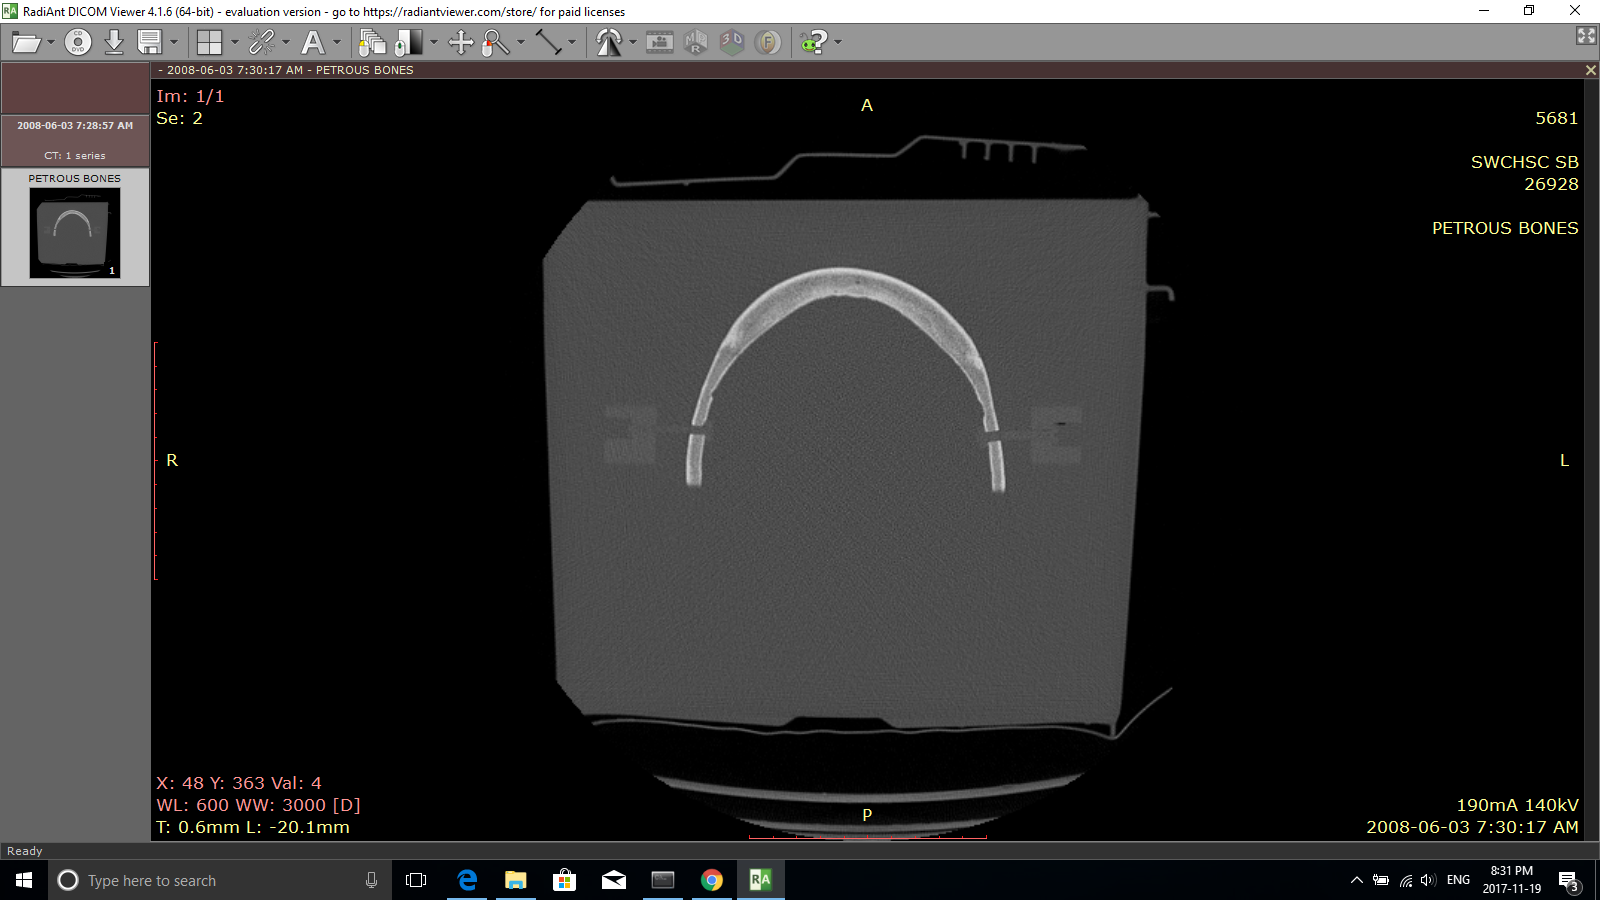

##### 2.3 opening Image attributes of IM_0028 and im140

In [2]:
RefDs = dicom.read_file('IM_0028.dcm')
print(RefDs)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_SE', 'M', 'SE']
(0008, 0012) Instance Creation Date              DA: '20120101'
(0008, 0013) Instance Creation Time              TM: '122531'
(0008, 0014) Instance Creator UID                UI: 1.3.46.670589.11.2501708638.4193405253.2729028880.3304384116
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.46.670589.11.3397498352.605445821.304410668.1378834227
(0008, 0020) Study Date                          DA: '20110101'
(0008, 0021) Series Date                         DA: '20110101'
(0008, 0022) Acquisition Date                    DA: '20110101'
(0008, 0023) Content Date                        DA: '20110101'
(0008, 0030) Study Time                          TM: '133916'
(0008, 0031) Series Time                         TM: '135504.20'
(0008, 0032) Acquisition Time    

In [3]:
RefDs = dicom.read_file('im140.dcm')
print(RefDs)

(0008, 0000) Group Length                        UL: 566
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20080603'
(0008, 0013) Instance Creation Time              TM: '073058'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113619.2.55.3.1284421438.720.1212483672.467.140
(0008, 0020) Study Date                          DA: '20080603'
(0008, 0021) Series Date                         DA: '20080603'
(0008, 0022) Acquisition Date                    DA: '20080603'
(0008, 0023) Content Date                        DA: '20080603'
(0008, 0030) Study Time                          TM: '072857'
(0008, 0031) Series Time                         TM: '073007'
(0008, 0032) Acquisition Time                    TM: '073017'
(0008, 0033) Content Time                   

##### 2.4 Answers:

##### 4.a Vendor of the device used:

In [4]:
print("file IM_0028")
RefDs = dicom.read_file('IM_0028.dcm')
print('The manufacturer is '+str(RefDs.Manufacturer)+' and the model is '+str(RefDs.ManufacturersModelName))

print("file im140")
RefDs = dicom.read_file('im140.dcm')
print('The manufacturer is '+str(RefDs.Manufacturer)+' and the model is '+str(RefDs.ManufacturersModelName))

file IM_0028
The manufacturer is Philips Medical Systems and the model is Achieva
file im140
The manufacturer is GE MEDICAL SYSTEMS and the model is LightSpeed VCT


##### 4.b image modality

In [5]:
RefDs = dicom.read_file('IM_0028.dcm')
print('the image modality of IM_0028 is ' +str(RefDs.Modality))

RefDs = dicom.read_file('im140.dcm')
print('the image modality of im140 is ' +str(RefDs.Modality))


the image modality of IM_0028 is MR
the image modality of im140 is CT


##### 4.c Name of the patient

In [6]:
RefDs = dicom.read_file('IM_0028.dcm')
if RefDs.PatientsName=='':
    print('The patient\'s name in file IM_0028 is unkown')
else:
    print('The patient\'s name in file IM_0028 is '+str(RefDs.PatientsName))

RefDs = dicom.read_file('im140.dcm')
if RefDs.PatientsName=='':
    print('The patient\'s name in file im140 is unkown')
else:
    print('The patient\'s name in file im140 is '+str(RefDs.PatientsName))

The patient's name in file IM_0028 is unkown
The patient's name in file im140 is unkown


##### 4.d Bits used for encoding

In [7]:
RefDs = dicom.read_file('IM_0028.dcm')
print('The image in file IM_0028 was encoded with '+str(RefDs.BitsStored)+' bits ')

RefDs = dicom.read_file('im140.dcm')
print('The image in file im140 was encoded with '+str(RefDs.BitsStored)+' bits ')

The image in file IM_0028 was encoded with 12 bits 
The image in file im140 was encoded with 16 bits 


##### 4.e Name the attributes related to scaling in IM_0028

there are three attributes related to scaling from the file IM_0028, they are
               1 Rescale intercept
               2 Rescale Slope
               3 Rescale type

##### 4.f 

In [8]:
RefDs = dicom.read_file('IM_0028.dcm')
print('The Pixel Spacing in file IM_0028 is '+str(RefDs.PixelSpacing))
print('The Image Orientation of the patient in file IM_0028 is '+str(RefDs.ImageOrientationPatient))
print('The Image Position of the patient in file IM_0028 is '+str(RefDs.ImagePositionPatient))
print('The Slice Thickness of the image in file IM_0028 is '+str(RefDs.SliceThickness))
print('The Slice Location in file IM_0028 is '+str(RefDs.SliceLocation))

#(0028, 0030) Pixel Spacing                       DS: ['0.732421875', '0.732421875']
#(0020, 0037) Image Orientation (Patient)         DS: ['1', '0', '0', '0', '1', '0']
#(0020, 0032) Image Position (Patient)            DS: ['-180.72742462158', '-227.5', '64.1605377197265']
#(0018, 0050) Slice Thickness                     DS: '7'
#(0020, 1041) Slice Location                      DS: '112.000003814697'
    

The Pixel Spacing in file IM_0028 is ['0.732421875', '0.732421875']
The Image Orientation of the patient in file IM_0028 is ['1', '0', '0', '0', '1', '0']
The Image Position of the patient in file IM_0028 is ['-180.72742462158', '-227.5', '64.1605377197265']
The Slice Thickness of the image in file IM_0028 is 7
The Slice Location in file IM_0028 is 112.000003814697


###### Pixel Spacing
            Specifies the Physical distance in the patient between the center of each pixel.
###### Image Orientation
            Specifies The direction cosines of the first row and the first column with respect to the patient.
###### Image Position 
            Specifies the x, y, and z coordinates of the upper left hand corner of the image
###### Slice Thickness 
            Specifies the Nominal slice thickness, in mm.
###### Slice Location 
            Is defined as the relative position of the image plane expressed in mm. This information is relative to an unspecified implementation specific reference point.


##### 4.g: Converting image information into bone density information in file im140:

 To convert the image information into actual bone density information, a bone-analysis software may be installed in a server and applied to analyze the image to obtain the actual bone density information (1).
 
 
 Reference:
  1. paper - Method and system for analyzing bone conditions using dicom compliant bone radiographic image 